# Visual Representation of Data
 using seaborn and matplotlib

In [17]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
sns.set_theme(style="darkgrid")
%matplotlib inline

In [2]:
# read the file
df_shopping_behavior = pd.read_csv("./DataSet/shopping_behavior_updated.csv")

In [3]:
df_shopping_behavior.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


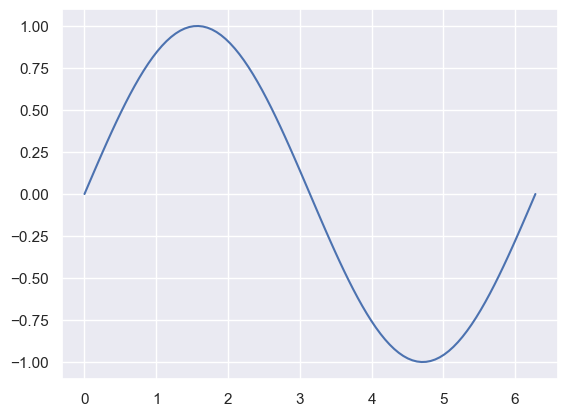

In [7]:
x=np.linspace(0,2*np.pi,100)
y=np.sin(x)
plt.plot(x,y)

In [21]:
from pycoingecko import CoinGeckoAPI
cg=CoinGeckoAPI()
bitcoin_data = cg.get_coin_market_chart_by_id(id="bitcoin",vs_currency="usd",days=90) 
bitcoin_price=bitcoin_data["prices"]
df_bitcoin = pd.DataFrame(bitcoin_price,columns=["TimeStamp","Price"])
df_bitcoin.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2163 entries, 0 to 2162
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TimeStamp  2163 non-null   int64  
 1   Price      2163 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 33.9 KB


In [22]:
df_bitcoin["TimeStamp"]=pd.to_datetime(df_bitcoin["TimeStamp"],unit="ms")
df_bitcoin

,TimeStamp,Price
0,2023-08-03 18:01:16.622,29215.037696
1,2023-08-03 19:01:06.073,29245.262235
2,2023-08-03 20:00:07.402,29258.097802
3,2023-08-03 21:00:33.185,29289.158250
4,2023-08-03 22:01:18.088,29228.811309
...,...,...
2158,2023-11-01 14:00:52.041,34499.464375
2159,2023-11-01 15:00:38.665,34268.536157
2160,2023-11-01 16:00:09.327,34254.653925
2161,2023-11-01 17:00:21.985,34446.447221


In [23]:
bitcoin_MC=bitcoin_data["market_caps"]
df_bitcoin_MC = pd.DataFrame(bitcoin_MC,columns=["TimeStamp","market caps"])
df_bitcoin["market caps"]=df_bitcoin_MC["market caps"]
df_bitcoin.head()
#{"":float,"market_caps":float,"total_volumes":float})

,TimeStamp,Price,market caps
0,2023-08-03 18:01:16.622,29215.037696,5.681434e+11
1,2023-08-03 19:01:06.073,29245.262235,5.680652e+11
2,2023-08-03 20:00:07.402,29258.097802,5.689366e+11
3,2023-08-03 21:00:33.185,29289.158250,5.692385e+11
4,2023-08-03 22:01:18.088,29228.811309,5.684207e+11


In [24]:
bitcoin_TV=bitcoin_data["total_volumes"]
df_bitcoin_TV = pd.DataFrame(bitcoin_TV,columns=["TimeStamp","total_volumes"])
df_bitcoin["total_volumes"]=df_bitcoin_TV["total_volumes"]
df_bitcoin.head()

,TimeStamp,Price,market caps,total_volumes
0,2023-08-03 18:01:16.622,29215.037696,5.681434e+11,1.174983e+10
1,2023-08-03 19:01:06.073,29245.262235,5.680652e+11,1.247411e+10
2,2023-08-03 20:00:07.402,29258.097802,5.689366e+11,1.009179e+10
3,2023-08-03 21:00:33.185,29289.158250,5.692385e+11,1.176784e+10
4,2023-08-03 22:01:18.088,29228.811309,5.684207e+11,1.248243e+10


In [25]:
candlestick_data=df_bitcoin.groupby(df_bitcoin.TimeStamp.dt.date).agg({"Price":["min","max","first","last"]})
candlestick_data.head()

Price                                          
                     min           max         first          last
TimeStamp                                                         
2023-08-03  29215.037696  29289.158250  29215.037696  29220.722582
2023-08-04  28942.929633  29255.678711  29172.607612  29031.835835
2023-08-05  28975.305653  29084.135770  29080.301697  29056.161769
2023-08-06  28978.415399  29083.604182  29046.800457  29047.048717
2023-08-07  28803.773430  29177.023896  29044.204376  29148.426462

In [28]:

fig=go.Figure(data=[go.Candlestick(x=candlestick_data.index,
                                   open=candlestick_data["Price"]["first"],
                                   high=candlestick_data["Price"]["max"],
                                   low=candlestick_data["Price"]["min"],
                                   close=candlestick_data["Price"]["last"]
                                   )])
fig.update_layout(xaxis_rangeslider_visible=True,xaxis_title="Date",yaxis_title="Price (usd $)",
                  title="Bitcoin Candlestick Chart Over Past 90 Days")
fig.show()
#plot(fig,filename="Bitcoin_Candlestick_graph.html")
#https://g.co/kgs/4Ufvjh
#https://g.co/kgs/c6WAuk
#https://g.co/kgs/tQ8mwp